# LRMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from utils import home_and_home_data

In [2]:
data = home_and_home_data([i for i in range(2000, 2004)])

In [3]:
df = data.copy()
del df['pts_diff_away']

In [4]:
df_count = df.groupby(["pts_diff_home"]).count()

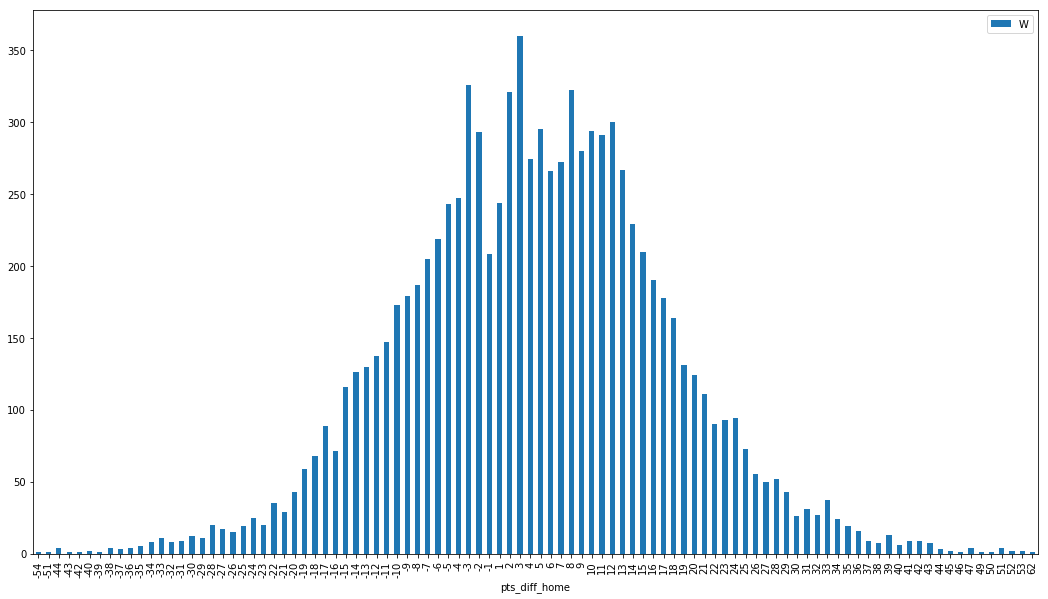

In [5]:
df_count.plot(kind='bar', figsize = (18, 10))
plt.show()

In [6]:
df_mean = df.groupby(["pts_diff_home"]).mean()

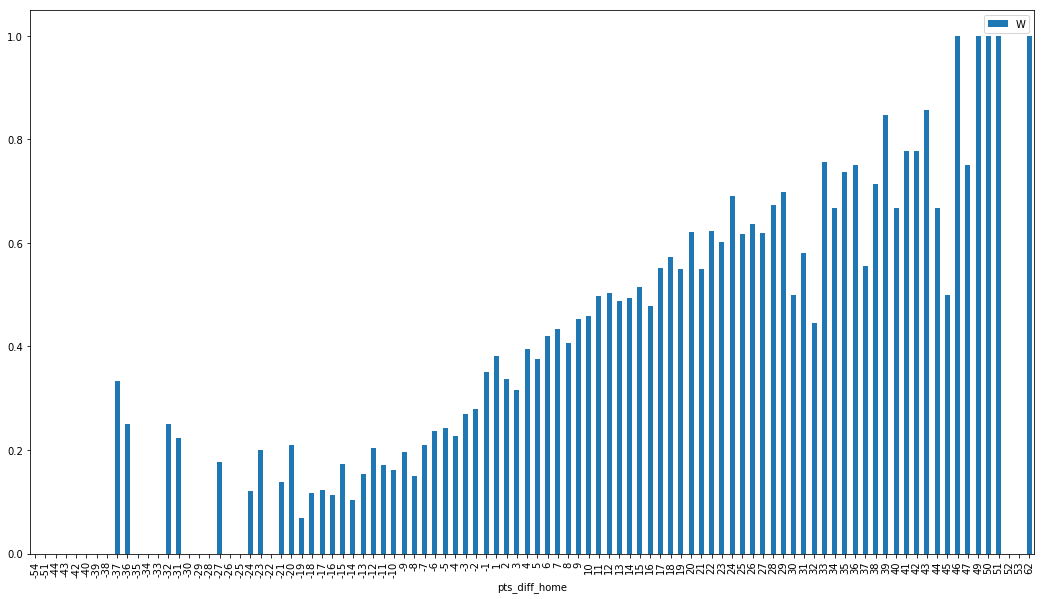

In [7]:
df_mean.plot(kind='bar', figsize = (18, 10))
plt.show()

In [8]:
X = data["pts_diff_home"].values.reshape(-1, 1)
y = data["W"].values.ravel()

y = y.astype('int')

In [9]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [10]:
print(clf.coef_, clf.intercept_)

[[0.02851478]] [-0.40862229]


In [11]:
def model(x):
    return 1 / (1 + np.exp(-x))

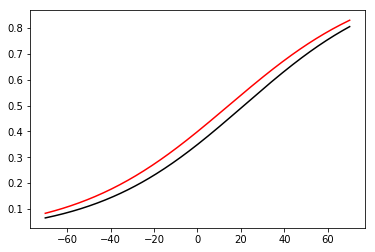

In [12]:
X_test = np.linspace(-70, 70, 300)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
loss_expected = model(X_test * 0.0292 - 0.6228).ravel()

plt.plot(X_test, loss, color='red')
plt.plot(X_test, loss_expected, color='black')

plt.show()